In [151]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, mannwhitneyu 
import seaborn as sns 
from mpl_toolkits.mplot3d import Axes3D
import scipy.stats as stats
from scipy.stats.mstats import winsorize
import missingno as msno
import pandas_profiling
%matplotlib inline

In [152]:
df_o = pd.read_csv('Desktop/Thinkful/Life Expectancy Data.csv')
df_o.head(2)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0


In [153]:
df_o.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
 BMI                               2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
 HIV/AIDS                          2938 non-null

My goal in this challenge is to find the factors that affect the life expectancy. Specifically, I need to find out which factors increase the expected life in the countries and which factors decrease it.


In [154]:
#df_o.isnull()

In [155]:
df_o.isnull().sum()*100/df_o.isnull().count()

Country                             0.000000
Year                                0.000000
Status                              0.000000
Life expectancy                     0.340368
Adult Mortality                     0.340368
infant deaths                       0.000000
Alcohol                             6.603131
percentage expenditure              0.000000
Hepatitis B                        18.822328
Measles                             0.000000
 BMI                                1.157250
under-five deaths                   0.000000
Polio                               0.646698
Total expenditure                   7.692308
Diphtheria                          0.646698
 HIV/AIDS                           0.000000
GDP                                15.248468
Population                         22.191967
 thinness  1-19 years               1.157250
 thinness 5-9 years                 1.157250
Income composition of resources     5.684139
Schooling                           5.547992
dtype: flo


## 1. Detect the problems with the data such as missing values and outliers. Are there any non- sense values that seem to be stemmed from the data collection? For the missing values, discuss which technique would be the most suitable one in filling out these values. Regard- ing the outliers, discuss their potential effects on your analysis and select an appropriate method to deal with them.

In [156]:
df_o.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

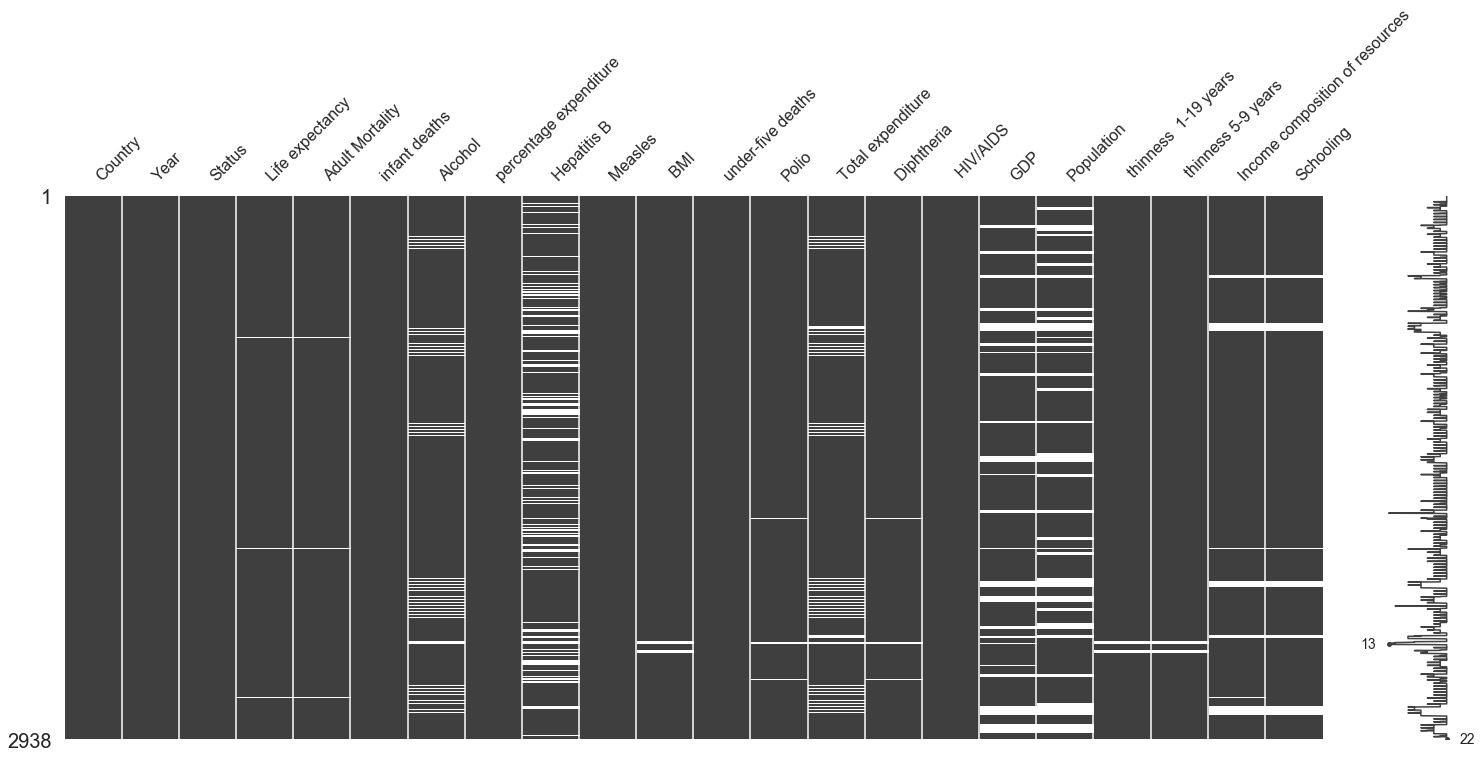

In [157]:
# Create nullity matrix for missing values 

msno.matrix(df_o)

In [158]:
#pandas_profiling.ProfileReport(df_o)

We can see that there are multiple missing values. Population, hepatitis b, and GDP are missing more than 10% of datapoints. 
I discovered that we have spaces in Columns. Now I'm going to remove them.

In [159]:
df = df_o.copy()

df.columns = ['_'.join(x.split()) for x in list([x.str.strip().str.lower() for x in [df.columns]])[0]]
df.columns

Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under-five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness_1-19_years',
       'thinness_5-9_years', 'income_composition_of_resources', 'schooling'],
      dtype='object')

In [160]:
# Create a list of all columns we want to work on.
fill_list = ["life_expectancy", "adult_mortality", "alcohol", 
             "hepatitis_b", "bmi", "polio", 
             "total_expenditure", "diphtheria",
             "gdp", "thinness_1-19_years", "thinness_5-9_years", "population", "income_composition_of_resources", "schooling"]
# Fill in all missing values from the column with the average of the same column
country = df["country"].unique()

for col in fill_list:
    for state in country: 
        if len(df.loc[df["country"] == state][col].unique())==1: 
            #col value is all null for that year, then fill it with 0 
            df.loc[df["country"] == state,  col]= df.loc[df["country"] == state,  col].fillna(0)
        else: 
            df.loc[df['country'] == state,  col] = df.loc[df["country"] == state, col].fillna(df[(df["country"] == state) & (df[col].isnull()==False) ][col].mean())

In [161]:
df.isnull().sum()*100/df.isnull().count()

country                            0.0
year                               0.0
status                             0.0
life_expectancy                    0.0
adult_mortality                    0.0
infant_deaths                      0.0
alcohol                            0.0
percentage_expenditure             0.0
hepatitis_b                        0.0
measles                            0.0
bmi                                0.0
under-five_deaths                  0.0
polio                              0.0
total_expenditure                  0.0
diphtheria                         0.0
hiv/aids                           0.0
gdp                                0.0
population                         0.0
thinness_1-19_years                0.0
thinness_5-9_years                 0.0
income_composition_of_resources    0.0
schooling                          0.0
dtype: float64

We have successfully filled in missing values.
The next step is to deal with outliers. 
But first we run some descriptive statistics on the data before and after we filled missing values to see if there was signifcant change.

In [162]:
df_o.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [163]:
df.describe()

,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.00000,2938.000000
mean,2007.518720,68.989312,164.235534,30.303948,4.574228,738.251295,74.793336,2419.592240,37.877774,42.035739,82.396266,5.856477,82.183944,1.742103,6361.299758,9.925971e+06,4.783696,4.813955,0.59188,11.327434
std,4.613841,10.327437,124.451093,117.926501,4.042375,1987.914858,29.858640,11467.272489,20.344920,160.445548,23.476067,2.531511,23.743205,5.077785,13402.383592,5.407539e+07,4.424924,4.512880,0.25114,4.265626
min,2000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,2.000000,0.100000,0.000000,0.000000e+00,0.000000,0.000000,0.00000,0.000000
25%,2004.000000,63.000000,73.000000,0.000000,0.852500,4.685343,65.461538,0.000000,19.000000,0.000000,78.000000,4.220000,78.000000,0.100000,234.463634,6.281500e+03,1.500000,1.500000,0.46500,9.500000
50%,2008.000000,72.000000,144.000000,3.000000,3.685000,64.912906,88.000000,17.000000,43.000000,4.000000,93.000000,5.710000,93.000000,0.100000,1178.176979,5.448670e+05,3.300000,3.300000,0.66200,12.100000
75%,2012.000000,75.600000,227.000000,22.000000,7.677500,441.534144,96.000000,360.250000,56.100000,28.000000,97.000000,7.430000,97.000000,0.800000,4779.405190,4.584371e+06,7.100000,7.200000,0.77200,14.100000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.94800,20.700000


After interploation, the mean of each column did shift in various degress. 
As expected the columns with the highest amounts of missing data (hepatitis_b, gdp, Population) recieved around 10% of change in mean. Overall, these changes are not as drastic so we will assume that the datapoints were missing at random.


## Outliers

First will see if the variables are normally distributed

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2b4a3550>,
      dtype=object)

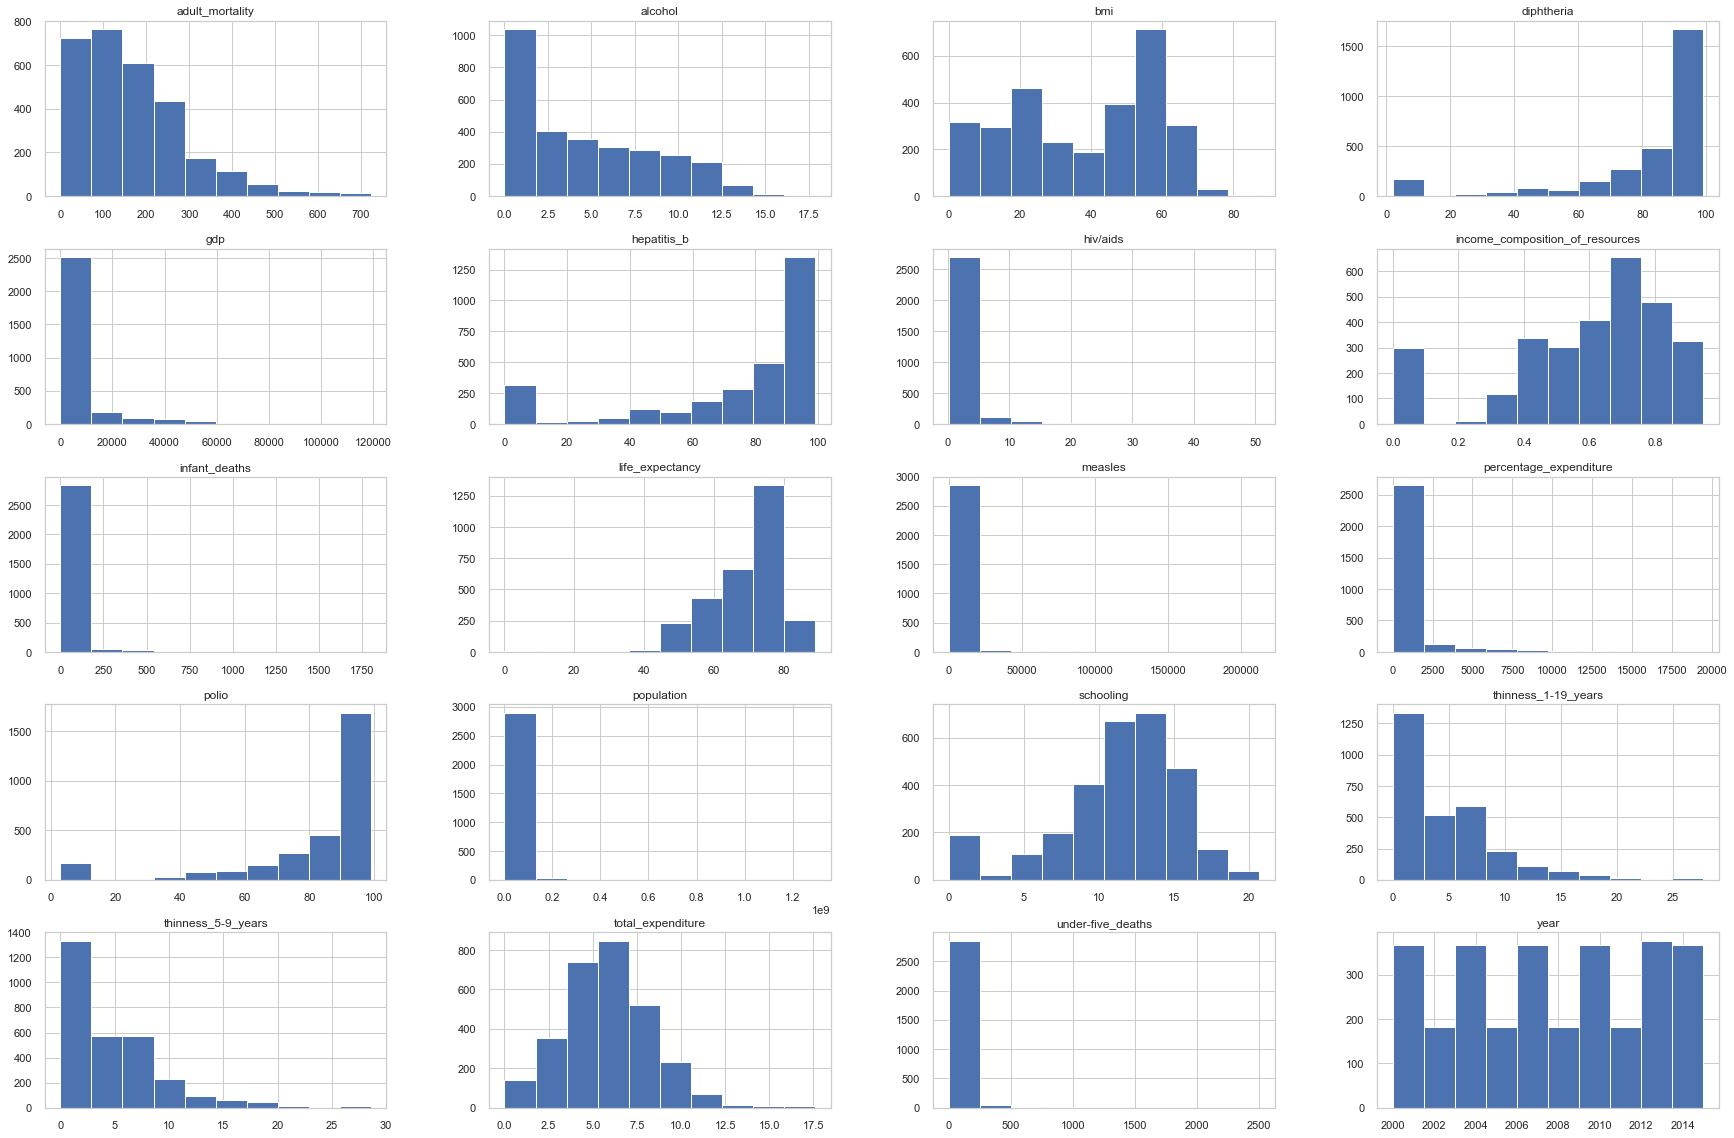

In [164]:
df.hist(figsize=(30,20))

Let's try the "Tukey's method" to see how many outliers we have.

In [165]:
list_of_columns = ['life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under-five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness_1-19_years',
       'thinness_5-9_years', 'income_composition_of_resources', 'schooling']

In [166]:
for col in list_of_columns:
    q75, q25 = np.percentile(df[col], [75 ,25])
    iqr = q75 - q25


    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)

    print("Number of outliers for {} is: {} and it is {} percent.".format(col, len((np.where((df[col] > max_val) 
                      | (df[col] < min_val))[0])), len((np.where((df[col] > max_val) | 
                                                    (df[col] < min_val))[0]))*100/1987))
   



Number of outliers for life_expectancy is: 20 and it is 1.0065425264217414 percent.
Number of outliers for adult_mortality is: 85 and it is 4.2778057372924 percent.
Number of outliers for infant_deaths is: 315 and it is 15.853044791142425 percent.
Number of outliers for alcohol is: 0 and it is 0.0 percent.
Number of outliers for percentage_expenditure is: 389 and it is 19.577252138902868 percent.
Number of outliers for hepatitis_b is: 333 and it is 16.758933064921994 percent.
Number of outliers for measles is: 542 and it is 27.27730246602919 percent.
Number of outliers for bmi is: 0 and it is 0.0 percent.
Number of outliers for under-five_deaths is: 394 and it is 19.828887770508302 percent.
Number of outliers for polio is: 290 and it is 14.594866633115249 percent.
Number of outliers for total_expenditure is: 34 and it is 1.7111222949169602 percent.
Number of outliers for diphtheria is: 309 and it is 15.551082033215904 percent.
Number of outliers for hiv/aids is: 542 and it is 27.277302

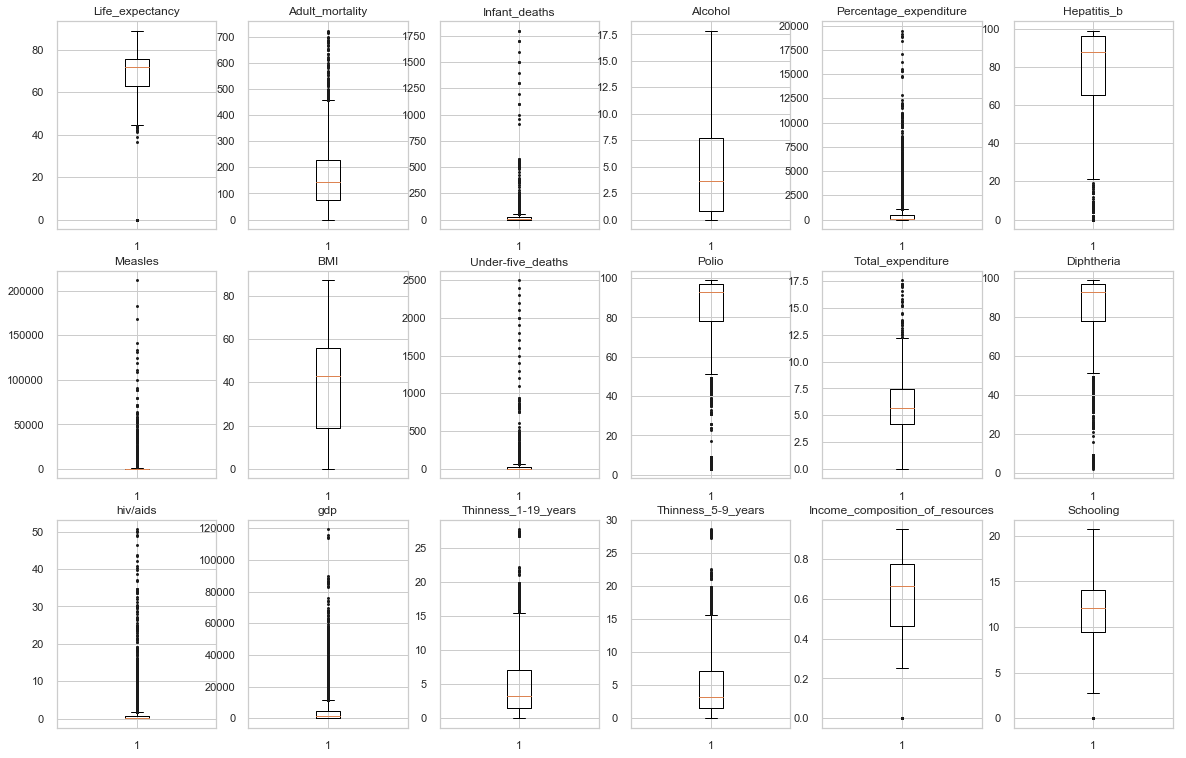

In [167]:
plt.figure(figsize = (20, 13))

plt.subplot(3,6,1)
plt.boxplot(df["life_expectancy"], sym='k.')
plt.title("Life_expectancy")

plt.subplot(3,6,2)
plt.boxplot(df["adult_mortality"], sym='k.')
plt.title("Adult_mortality")

plt.subplot(3,6,3)
plt.boxplot(df["infant_deaths"], sym='k.')
plt.title("Infant_deaths")

plt.subplot(3,6,4)
plt.boxplot(df["alcohol"], sym='k.')
plt.title("Alcohol")

plt.subplot(3,6,5)
plt.boxplot(df["percentage_expenditure"], sym='k.')
plt.title("Percentage_expenditure")

plt.subplot(3,6,6)
plt.boxplot(df["hepatitis_b"], sym='k.')
plt.title("Hepatitis_b")

plt.subplot(3,6,7)
plt.boxplot(df["measles"], sym='k.')
plt.title("Measles")

plt.subplot(3,6,8)
plt.boxplot(df["bmi"], sym='k.')
plt.title("BMI")

plt.subplot(3,6,9)
plt.boxplot(df["under-five_deaths"], sym='k.')
plt.title("Under-five_deaths")

plt.subplot(3,6,10)
plt.boxplot(df["polio"], sym='k.')
plt.title("Polio")

plt.subplot(3,6,11)
plt.boxplot(df["total_expenditure"], sym='k.')
plt.title("Total_expenditure")

plt.subplot(3,6,12)
plt.boxplot(df["diphtheria"], sym='k.')
plt.title("Diphtheria")

plt.subplot(3,6,13)
plt.boxplot(df["hiv/aids"], sym='k.')
plt.title("hiv/aids")

plt.subplot(3,6,14)
plt.boxplot(df["gdp"], sym='k.')
plt.title("gdp")

plt.subplot(3,6,15)
plt.boxplot(df["thinness_1-19_years"], sym='k.')
plt.title("Thinness_1-19_years")

plt.subplot(3,6,16)
plt.boxplot(df["thinness_5-9_years"], sym='k.')
plt.title("Thinness_5-9_years")

plt.subplot(3,6,17)
plt.boxplot(df["income_composition_of_resources"], sym='k.')
plt.title("Income_composition_of_resources")

plt.subplot(3,6,18)
plt.boxplot(df["schooling"], sym='k.')
plt.title("Schooling")


plt.show()

Text(0.5, 1.0, 'Population')

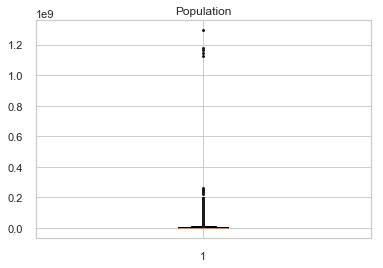

In [168]:
plt.boxplot(df["population"], sym='k.')
plt.title("Population")

As we can see, the variables are not normally distributed and there are multiple outliers in the dataset. 
To treat these outliers we will use winsorization and we will use the Tukey method to statistically identify outliers.

Text(0.5, 1.0, 'life_expectancy_winsorized')

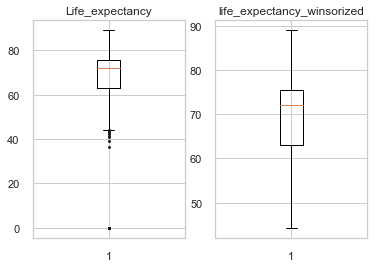

In [169]:
#plt.figure(figsize=(10,3))
plt.subplot (1,2,1)
plt.boxplot(df["life_expectancy"], sym='k.')
plt.title("Life_expectancy")

life_expectancy_winsorized = winsorize(df["life_expectancy"], (0.007, 0))
plt.subplot (1,2,2)
plt.boxplot(life_expectancy_winsorized)
plt.title("life_expectancy_winsorized")

Text(0.5, 1.0, 'infant_deaths_winsorized')

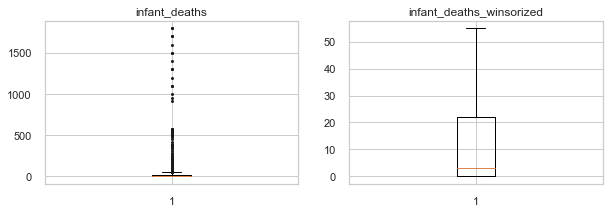

In [170]:
plt.figure(figsize=(10,3))
plt.subplot (1,2,1)
plt.boxplot(df["infant_deaths"], sym='k.')
plt.title("infant_deaths")

infant_deaths_winsorized = winsorize(df["infant_deaths"], (0, 0.109))
plt.subplot (1,2,2)
plt.boxplot(infant_deaths_winsorized)
plt.title("infant_deaths_winsorized")

Text(0.5, 1.0, 'adult_mortality_winsorized')

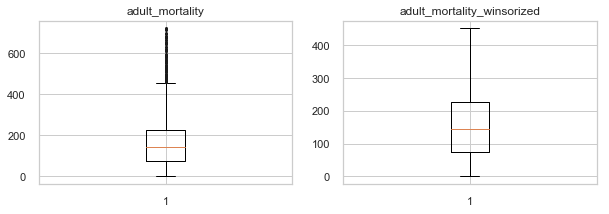

In [171]:
plt.figure(figsize=(10,3))
plt.subplot (1,2,1)
plt.boxplot(df["adult_mortality"], sym='k.')
plt.title("adult_mortality")

adult_mortality_winsorized = winsorize(df["adult_mortality"], (0, 0.03))
plt.subplot (1,2,2)
plt.boxplot(adult_mortality_winsorized)
plt.title("adult_mortality_winsorized")


Text(0.5, 1.0, 'percentage_expenditure_winsorized')

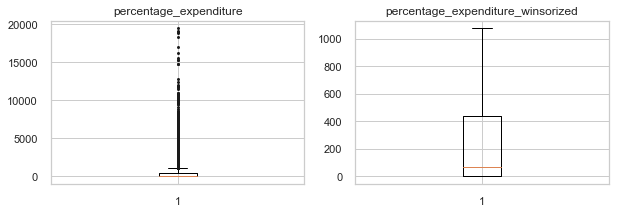

In [172]:
plt.figure(figsize=(10,3))
plt.subplot (1,2,1)
plt.boxplot(df["percentage_expenditure"], sym='k.')
plt.title("percentage_expenditure")

percentage_expenditure_winsorized = winsorize(df["percentage_expenditure"], (0, 0.135))
plt.subplot (1,2,2)
plt.boxplot(percentage_expenditure_winsorized)
plt.title("percentage_expenditure_winsorized")

Text(0.5, 1.0, 'hepatitis_b_winsorized')

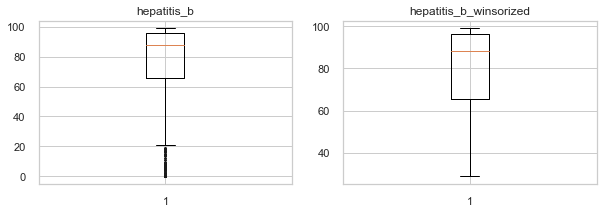

In [173]:
plt.figure(figsize=(10,3))
plt.subplot (1,2,1)
plt.boxplot(df["hepatitis_b"], sym='k.')
plt.title("hepatitis_b")

hepatitis_b_winsorized = winsorize(df["hepatitis_b"], (0.12, 0))
plt.subplot (1,2,2)
plt.boxplot(hepatitis_b_winsorized)
plt.title("hepatitis_b_winsorized")

Text(0.5, 1.0, 'measles_winsorized')

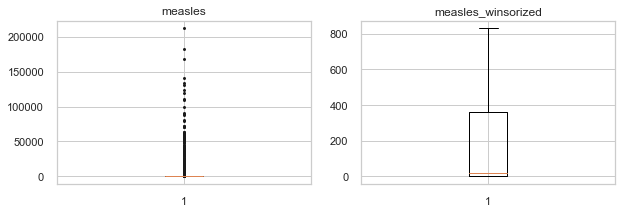

In [174]:
plt.figure(figsize=(10,3))
plt.subplot (1,2,1)
plt.boxplot(df["measles"], sym='k.')
plt.title("measles")

measles_winsorized = winsorize(df["measles"], (0, 0.19))
plt.subplot (1,2,2)
plt.boxplot(measles_winsorized)
plt.title("measles_winsorized")

Text(0.5, 1.0, 'under_five_deaths_winsorized')

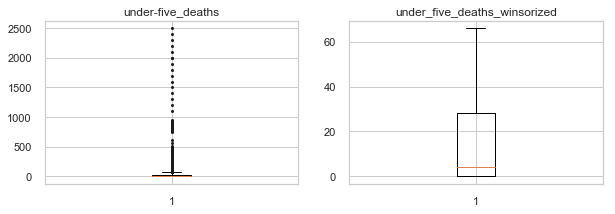

In [175]:
plt.figure(figsize=(10,3))
plt.subplot (1,2,1)
plt.boxplot(df["under-five_deaths"], sym='k.')
plt.title("under-five_deaths")

under_five_deaths_winsorized = winsorize(df["under-five_deaths"], (0, 0.14))
plt.subplot (1,2,2)
plt.boxplot(under_five_deaths_winsorized)
plt.title("under_five_deaths_winsorized")

Text(0.5, 1.0, 'polio_winsorized')

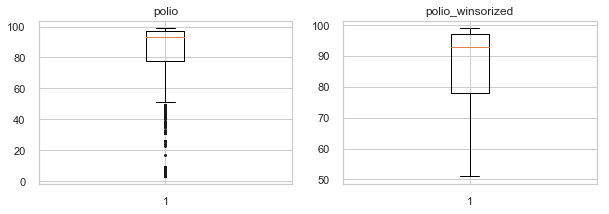

In [176]:
plt.figure(figsize=(10,3))
plt.subplot (1,2,1)
plt.boxplot(df["polio"], sym='k.')
plt.title("polio")

polio_winsorized = winsorize(df["polio"], (0.1, 0))
plt.subplot (1,2,2)
plt.boxplot(polio_winsorized)
plt.title("polio_winsorized")

Text(0.5, 1.0, 'total_expenditure_winsorized')

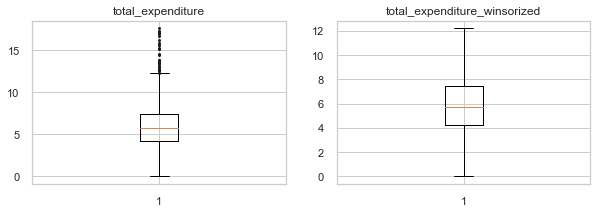

In [177]:
plt.figure(figsize=(10,3))
plt.subplot (1,2,1)
plt.boxplot(df["total_expenditure"], sym='k.')
plt.title("total_expenditure")

total_expenditure_winsorized = winsorize(df["total_expenditure"], (0, 0.012))
plt.subplot (1,2,2)
plt.boxplot(total_expenditure_winsorized)
plt.title("total_expenditure_winsorized")

Text(0.5, 1.0, 'diphtheria_winsorized')

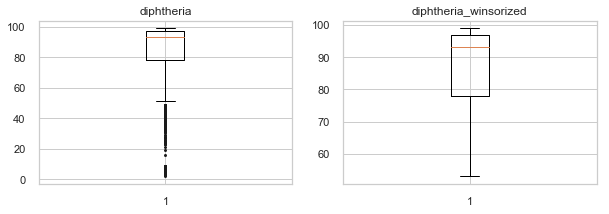

In [178]:
plt.figure(figsize=(10,3))
plt.subplot (1,2,1)
plt.boxplot(df["diphtheria"], sym='k.')
plt.title("diphtheria")

diphtheria_winsorized = winsorize(df["diphtheria"], (0.11, 0))
plt.subplot (1,2,2)
plt.boxplot(diphtheria_winsorized)
plt.title("diphtheria_winsorized")

Text(0.5, 1.0, 'hiv_aids_winsorized')

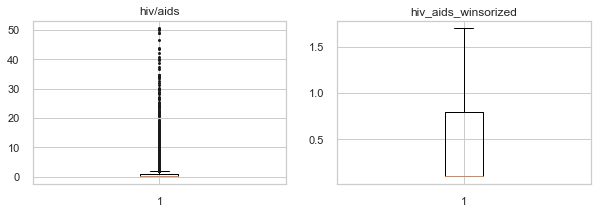

In [179]:
plt.figure(figsize=(10,3))
plt.subplot (1,2,1)
plt.boxplot(df["hiv/aids"], sym='k.')
plt.title("hiv/aids")

hiv_aids_winsorized = winsorize(df["hiv/aids"], (0, 0.19))
plt.subplot (1,2,2)
plt.boxplot(hiv_aids_winsorized)
plt.title("hiv_aids_winsorized")

Text(0.5, 1.0, 'gdp_winsorized')

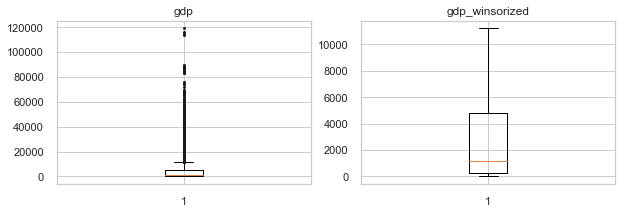

In [180]:
plt.figure(figsize=(10,3))
plt.subplot (1,2,1)
plt.boxplot(df["gdp"], sym='k.')
plt.title("gdp")

gdp_winsorized = winsorize(df["gdp"], (0, 0.15))
plt.subplot (1,2,2)
plt.boxplot(gdp_winsorized)
plt.title("gdp_winsorized")

Text(0.5, 1.0, 'population_winsorized')

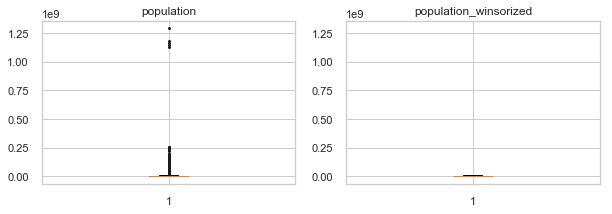

In [181]:
plt.figure(figsize=(10,3))
plt.subplot (1,2,1)
plt.boxplot(df["population"], sym='k.')
plt.title("population")

population_winsorized = winsorize(df["population"], (0, 0))
plt.subplot (1,2,2)
plt.boxplot(population_winsorized)
plt.title("population_winsorized")

#I'M NOT SURE WE SHOULD DO THIS FOR POPULATION

Text(0.5, 1.0, 'thinness_1_19_years_winsorized')

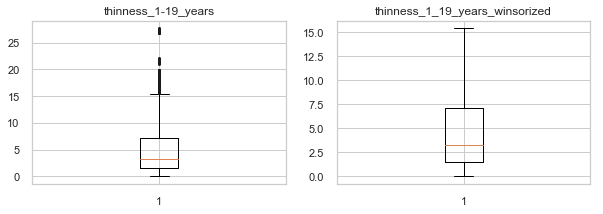

In [182]:
plt.figure(figsize=(10,3))
plt.subplot (1,2,1)
plt.boxplot(df["thinness_1-19_years"], sym='k.')
plt.title("thinness_1-19_years")

thinness_1_19_years_winsorized = winsorize(df["thinness_1-19_years"], (0, 0.031))
plt.subplot (1,2,2)
plt.boxplot(thinness_1_19_years_winsorized)
plt.title("thinness_1_19_years_winsorized")

Text(0.5, 1.0, 'thinness_5_9_years_winsorized')

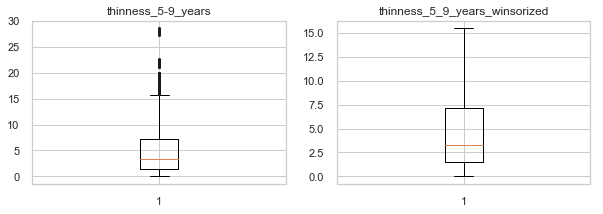

In [183]:
plt.figure(figsize=(10,3))
plt.subplot (1,2,1)
plt.boxplot(df["thinness_5-9_years"], sym='k.')
plt.title("thinness_5-9_years")

thinness_5_9_years_winsorized = winsorize(df["thinness_5-9_years"], (0, 0.035))
plt.subplot (1,2,2)
plt.boxplot(thinness_5_9_years_winsorized)
plt.title("thinness_5_9_years_winsorized")

Text(0.5, 1.0, 'income_composition_of_resources_winsorized')

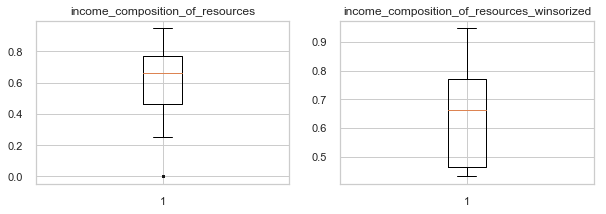

In [184]:
plt.figure(figsize=(10,3))
plt.subplot (1,2,1)
plt.boxplot(df["income_composition_of_resources"], sym='k.')
plt.title("income_composition_of_resources")

income_composition_of_resources_winsorized = winsorize(df["income_composition_of_resources"], (0.2, 0))
plt.subplot (1,2,2)
plt.boxplot(income_composition_of_resources_winsorized)
plt.title("income_composition_of_resources_winsorized")

Text(0.5, 1.0, 'schooling_winsorized')

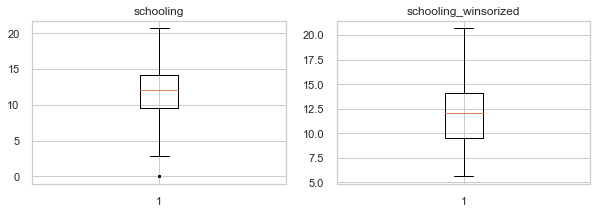

In [185]:
plt.figure(figsize=(10,3))
plt.subplot (1,2,1)
plt.boxplot(df["schooling"], sym='k.')
plt.title("schooling")

schooling_winsorized = winsorize(df["schooling"], (0.1, 0))
plt.subplot (1,2,2)
plt.boxplot(schooling_winsorized)
plt.title("schooling_winsorized")

Text(0.5, 1.0, 'alcohol_winsorized')

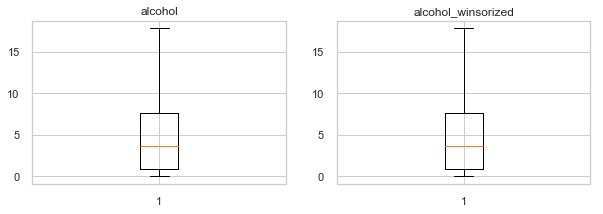

In [186]:
plt.figure(figsize=(10,3))
plt.subplot (1,2,1)
plt.boxplot(df["alcohol"], sym='k.')
plt.title("alcohol")

alcohol_winsorized = winsorize(df["alcohol"], (0, 0))
plt.subplot (1,2,2)
plt.boxplot(alcohol_winsorized)
plt.title("alcohol_winsorized")


Text(0.5, 1.0, 'bmi_winsorized')

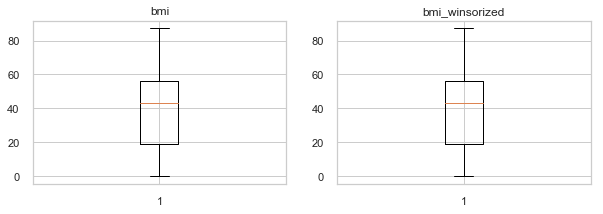

In [187]:
plt.figure(figsize=(10,3))
plt.subplot (1,2,1)
plt.boxplot(df["bmi"], sym='k.')
plt.title("bmi")

bmi_winsorized = winsorize(df["bmi"], (0, 0))
plt.subplot (1,2,2)
plt.boxplot(bmi_winsorized)
plt.title("bmi_winsorized")

In [188]:
list_winsorized = [life_expectancy_winsorized, adult_mortality_winsorized, infant_deaths_winsorized, 
                   alcohol_winsorized, percentage_expenditure_winsorized, hepatitis_b_winsorized,
                   measles_winsorized, bmi_winsorized, under_five_deaths_winsorized, polio_winsorized,
                   total_expenditure_winsorized, diphtheria_winsorized, hiv_aids_winsorized, gdp_winsorized,
                   population_winsorized, thinness_1_19_years_winsorized, thinness_5_9_years_winsorized,
                   income_composition_of_resources_winsorized, schooling_winsorized]

In [189]:
for col in list_winsorized:
    q75, q25 = np.percentile(col, [75 ,25])
    iqr = q75 - q25


    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)

    print("Number of outliers after winsorization: {}".format(len(np.where((col > max_val) 
                      | (col < min_val))[0])))
                                                                    
   

Number of outliers after winsorization: 0
Number of outliers after winsorization: 0
Number of outliers after winsorization: 0
Number of outliers after winsorization: 0
Number of outliers after winsorization: 0
Number of outliers after winsorization: 0
Number of outliers after winsorization: 0
Number of outliers after winsorization: 0
Number of outliers after winsorization: 0
Number of outliers after winsorization: 0
Number of outliers after winsorization: 0
Number of outliers after winsorization: 0
Number of outliers after winsorization: 0
Number of outliers after winsorization: 0
Number of outliers after winsorization: 438
Number of outliers after winsorization: 0
Number of outliers after winsorization: 0
Number of outliers after winsorization: 0
Number of outliers after winsorization: 0


In [190]:
# Add winsorized variable to the dataframe 
df['life_expectancy_winsorized']= life_expectancy_winsorized
df['adult_mortality_winsorized']=adult_mortality_winsorized
df['infant_deaths_winsorized']=infant_deaths_winsorized
df['alcohol_winsorized']=alcohol_winsorized
df['percentage_expenditure_winsorized']= percentage_expenditure_winsorized
df['hepatitis_b_winsorized']=hepatitis_b_winsorized
df['measles_winsorized']=measles_winsorized
df['bmi_winsorized']=bmi_winsorized
df['under_five_deaths_winsorized']=under_five_deaths_winsorized
df['polio_winsorized']=polio_winsorized
df['total_expenditure_winsorized']=total_expenditure_winsorized
df['diphtheria_winsorized/AIDS']=diphtheria_winsorized
df['hiv_aids_winsorized']=hiv_aids_winsorized
df['gdp_winsorized']=gdp_winsorized
df['population_winsorized']=population_winsorized
df['thinness_1_19_years_winsorized']=thinness_1_19_years_winsorized
df['thinness_5_9_years_winsorized']=thinness_5_9_years_winsorized
df['income_composition_of_resources_winsorized']=income_composition_of_resources_winsorized
df['schooling_winsorized']=schooling_winsorized


## 2. Explore the data using univariate and multivariate exploration techniques. You should pay special attention to your target variable. In this regard, your focus should be on finding the relevant variables that may affect life expectancy.

In [191]:
df.columns

Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under-five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness_1-19_years',
       'thinness_5-9_years', 'income_composition_of_resources', 'schooling',
       'life_expectancy_winsorized', 'adult_mortality_winsorized',
       'infant_deaths_winsorized', 'alcohol_winsorized',
       'percentage_expenditure_winsorized', 'hepatitis_b_winsorized',
       'measles_winsorized', 'bmi_winsorized', 'under_five_deaths_winsorized',
       'polio_winsorized', 'total_expenditure_winsorized',
       'diphtheria_winsorized/AIDS', 'hiv_aids_winsorized', 'gdp_winsorized',
       'population_winsorized', 'thinness_1_19_years_winsorized',
       'thinness_5_9_years_winsorized',
       'income_composition_of_resources_winsorized', 'schooling_winsorized'],
      dtype='object')

In [192]:
df_w = df[['country', 'year', 'status','life_expectancy_winsorized', 'adult_mortality_winsorized',
       'infant_deaths_winsorized', 'alcohol_winsorized',
       'percentage_expenditure_winsorized', 'hepatitis_b_winsorized',
       'measles_winsorized', 'bmi_winsorized', 'under_five_deaths_winsorized',
       'polio_winsorized', 'total_expenditure_winsorized',
       'diphtheria_winsorized/AIDS', 'hiv_aids_winsorized', 'gdp_winsorized',
       'population_winsorized', 'thinness_1_19_years_winsorized',
       'thinness_5_9_years_winsorized',
       'income_composition_of_resources_winsorized', 'schooling_winsorized']].copy()

In [193]:
df_w.describe()

,year,life_expectancy_winsorized,adult_mortality_winsorized,infant_deaths_winsorized,alcohol_winsorized,percentage_expenditure_winsorized,hepatitis_b_winsorized,measles_winsorized,bmi_winsorized,under_five_deaths_winsorized,polio_winsorized,total_expenditure_winsorized,diphtheria_winsorized/AIDS,hiv_aids_winsorized,gdp_winsorized,population_winsorized,thinness_1_19_years_winsorized,thinness_5_9_years_winsorized,income_composition_of_resources_winsorized,schooling_winsorized
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000
mean,2007.518720,69.148673,161.330497,13.635126,4.574228,281.501093,77.550942,220.691287,37.877774,17.417971,85.303686,5.827762,85.476320,0.508237,3214.867490,9.925971e+06,4.650987,4.664398,0.641210,11.722124
std,4.613841,9.593575,115.532620,19.108928,4.042375,384.161450,23.706092,329.192321,20.344920,24.075262,15.630623,2.436980,15.118002,0.640847,3982.647069,5.407539e+07,3.966879,3.996149,0.159492,3.380832
min,2000.000000,44.300000,0.000000,0.000000,0.000000,0.000000,28.846154,0.000000,0.000000,0.000000,51.000000,0.000000,53.000000,0.100000,0.000000,0.000000e+00,0.000000,0.000000,0.431000,5.600000
25%,2004.000000,63.000000,73.000000,0.000000,0.852500,4.685343,65.461538,0.000000,19.000000,0.000000,78.000000,4.220000,78.000000,0.100000,234.463634,6.281500e+03,1.500000,1.500000,0.465000,9.500000
50%,2008.000000,72.000000,144.000000,3.000000,3.685000,64.912906,88.000000,17.000000,43.000000,4.000000,93.000000,5.710000,93.000000,0.100000,1178.176979,5.448670e+05,3.300000,3.300000,0.662000,12.100000
75%,2012.000000,75.600000,227.000000,22.000000,7.677500,441.534144,96.000000,360.250000,56.100000,28.000000,97.000000,7.430000,97.000000,0.800000,4779.405190,4.584371e+06,7.100000,7.200000,0.772000,14.100000
max,2015.000000,89.000000,452.000000,55.000000,17.870000,1077.712092,99.000000,831.000000,87.300000,66.000000,99.000000,12.230000,99.000000,1.700000,11224.154800,1.293859e+09,15.400000,15.500000,0.948000,20.700000


This is a new dataset contains only "year" from the origina data set and rest of the atributes are after treating outliers by using the winsorize method. 

In [194]:
features = ['life_expectancy_winsorized', 'adult_mortality_winsorized',
       'infant_deaths_winsorized', 'alcohol_winsorized',
       'percentage_expenditure_winsorized', 'hepatitis_b_winsorized',
       'measles_winsorized', 'bmi_winsorized', 'under_five_deaths_winsorized',
       'polio_winsorized', 'total_expenditure_winsorized',
       'diphtheria_winsorized/AIDS', 'hiv_aids_winsorized', 'gdp_winsorized',
       'population_winsorized', 'thinness_1_19_years_winsorized',
       'thinness_5_9_years_winsorized',
       'income_composition_of_resources_winsorized', 'schooling_winsorized']

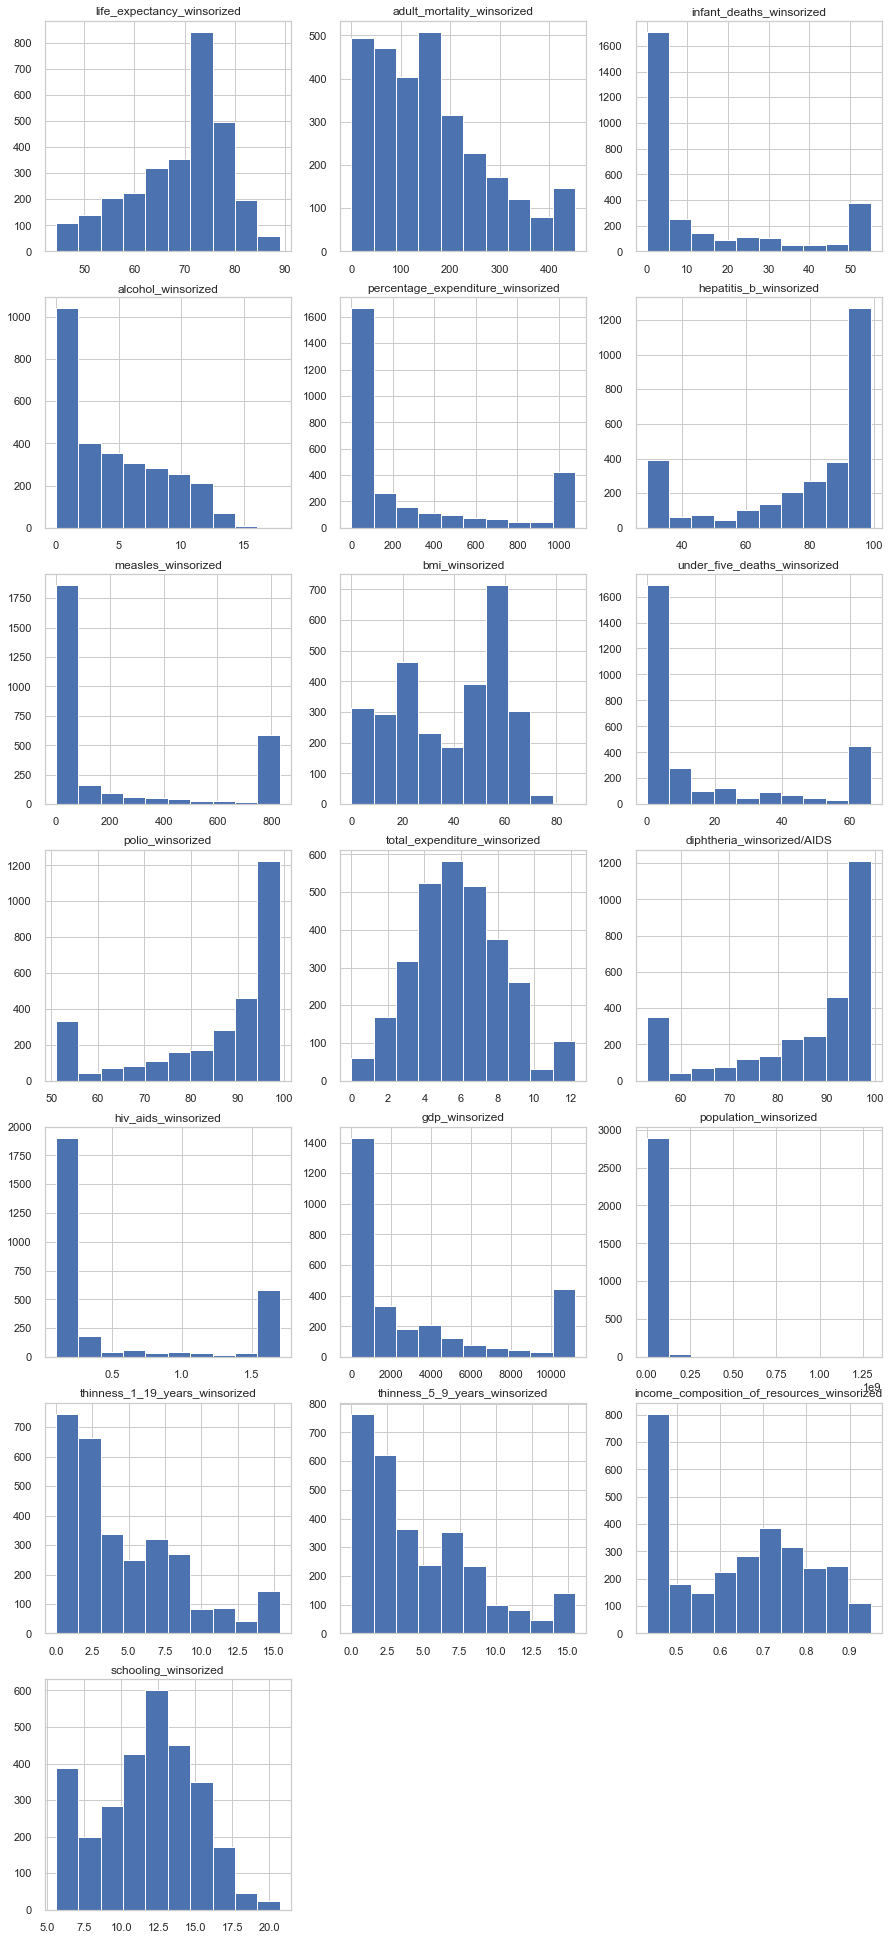

In [195]:
# Plot variables 

plt.figure(figsize=(15,50))

for i in range(len(features)):
    plt.subplot(10,3,i+1)
    plt.hist(df[features[i]])
    plt.title(features[i])

plt.show()

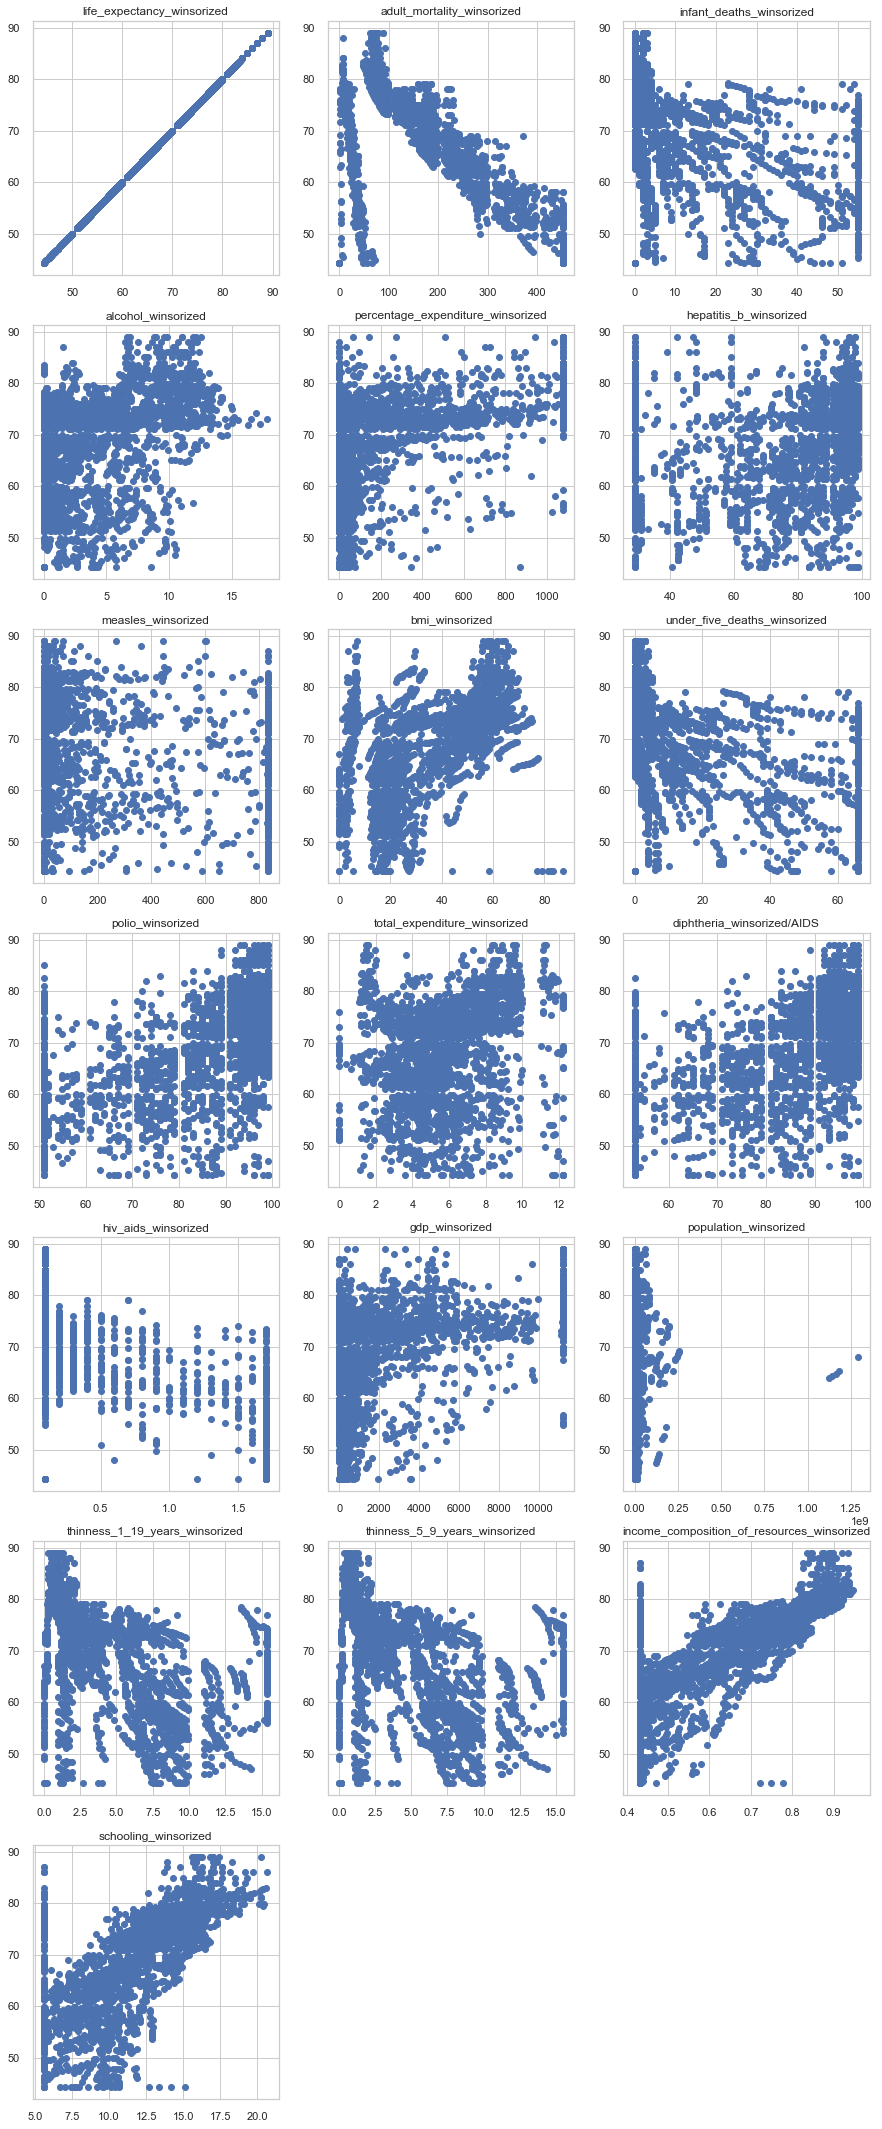

In [196]:
# Make scatterplot of winsorized life expectancy and other winsorized variables

plt.figure(figsize=(15,55))

for i in range(len(features)):
    plt.subplot(10,3,i+1)
    plt.scatter(df[features[i]],y=df['life_expectancy_winsorized'])
    plt.title(features[i])

plt.show()


We can see life expectancy has a positive relationship with winsorized income, bmi and schooling. 
Generally, countries with more resources and an educated population will have a higher standard of living and higher life expectancy.

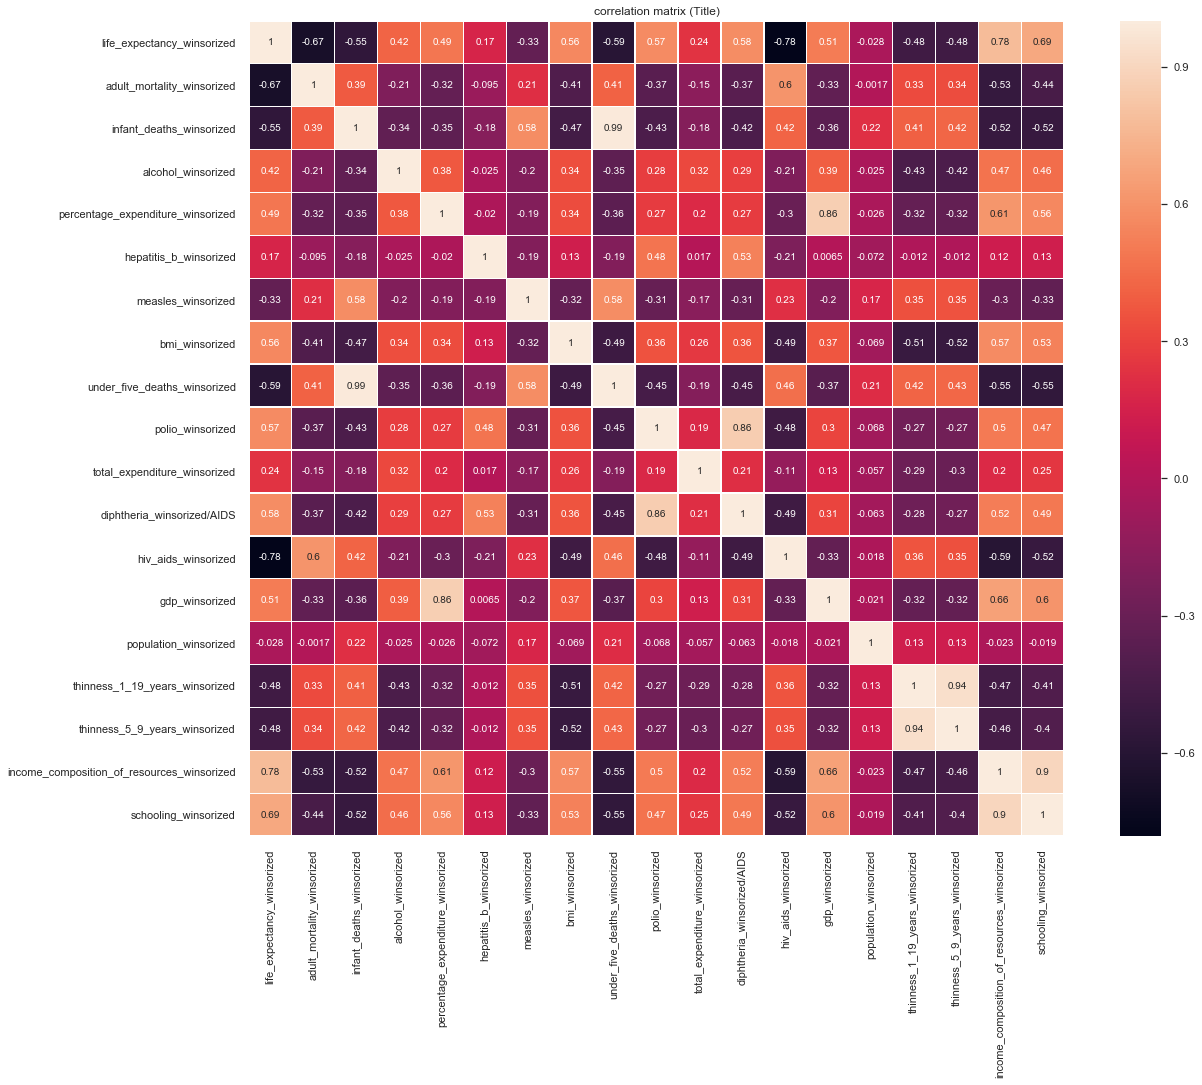

In [197]:
plt.figure(figsize=(20,15))
sns.heatmap(df_w[features].corr(), square=True, annot=True, linewidths=.5)
plt.title("correlation matrix (Title)")
plt.show()

Here, we can see correlation between life expectancy and other variables.

Highly Correlated pairs:

- GDP and percent expenditure (0.86)
- diphitheria and polio (0.86)
- life expectancy and income (0.78)
- life expectancy and schooling (0.69)

Now, we will transition our focus on the continuous feature - status and year.

In [198]:
df[['status','life_expectancy']].groupby(['status']).mean()

,life_expectancy
status,
Developed,79.197852
Developing,66.834831


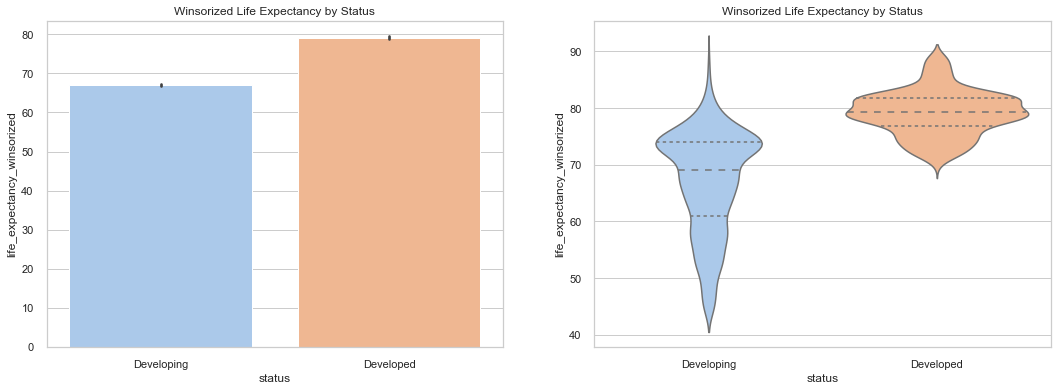

In [199]:
# Plot winsorized life expectancy by status 

plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
ax = sns.barplot(x="status", y="life_expectancy_winsorized",data=df, palette="pastel")
plt.title('Winsorized Life Expectancy by Status')

plt.subplot(1,2,2)
ax = sns.violinplot(x="status", y="life_expectancy_winsorized",inner='quartile',data=df, palette="pastel")
plt.title('Winsorized Life Expectancy by Status')

plt.show()

Developed countries have higher average Life Expectancy compared to Developing.

Text(0.5, 1.0, 'Winsorized Life Expectancy by Year')

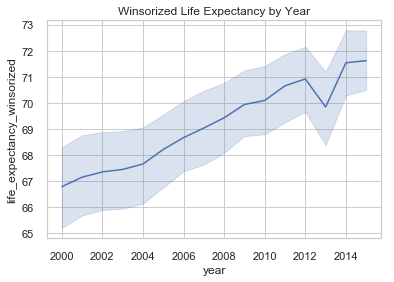

In [200]:
# Plot winsorized life expectancy by year 

ax = sns.lineplot(x="year", y="life_expectancy_winsorized",data=df)
plt.title('Winsorized Life Expectancy by Year')

We can see the average increase of life expectancy over the years with a confidence interval.

Let's take a look at bivariate distributions

Text(0.5, 1.0, 'BMI vs. Life Expectancy')

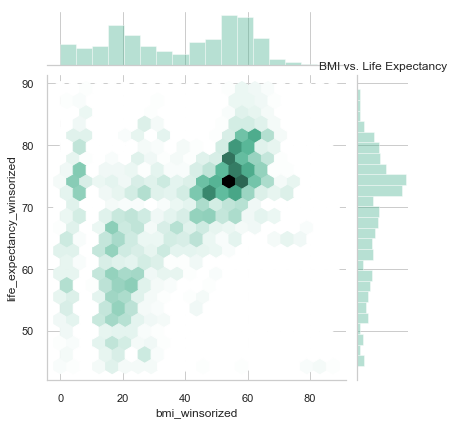

In [201]:
ax = sns.jointplot(x="bmi_winsorized", y="life_expectancy_winsorized", data=df, kind="hex", color="#4CB391");

plt.title('BMI vs. Life Expectancy')

Text(0.5, 1.0, 'Income vs. Life Expectancy')

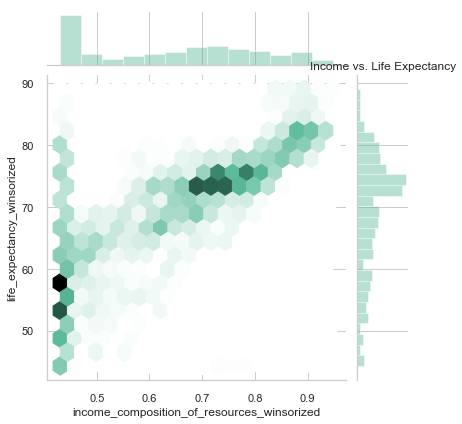

In [202]:
sns.jointplot(x="income_composition_of_resources_winsorized", y="life_expectancy_winsorized",data=df, kind="hex", color="#4CB391")
plt.title('Income vs. Life Expectancy')

Text(0.5, 1.0, 'Schooling vs. Life Expectancy')

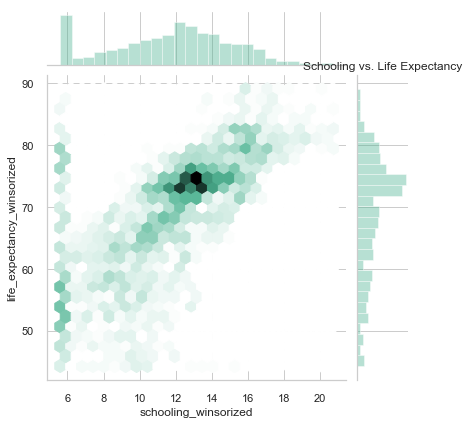

In [203]:
sns.jointplot(x="schooling_winsorized", y="life_expectancy_winsorized",data=df, kind="hex", color="#4CB391")
plt.title('Schooling vs. Life Expectancy')



## 3. In the feature engineering step, you need to select a suite of variables that you think would be ideal in the modeling phase. More concretely, you may discard some variables that are very correlated with the other ones or the variables that you think irrelevant with the life expectancy.


I dropped "thinness 1-19 years" as it seems to be almost the same as "thinness 5-9 years" and "infant deaths" because it is highly correlated to "under-five deaths".

#### Target Variable:
- life expectancy

#### Positive Variables:
- Schooling
- Income composition of resources


#### Negative Variables:
- HIV/AIDS


Let's check if out Target Feature normally distributed using jarque_bera test and normaltest

In [204]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

jb_stats = jarque_bera(np.sqrt(df["life_expectancy_winsorized"]))
norm_stats = normaltest(np.sqrt(df["life_expectancy_winsorized"]))

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))


Jarque-Bera test statistics is 300.94255984676727 and p value is 0.0
Normality test statistics is 239.0692168549682 and p value is 1.221178539219939e-52


The p-values are 0 which indicates that the distribution of target variables is statistically different from the normal distribution. We will apply the BoxCox this transformation.

Text(0.5, 1.0, 'Histogram of Life Expectancy (BoxCox transformed)')

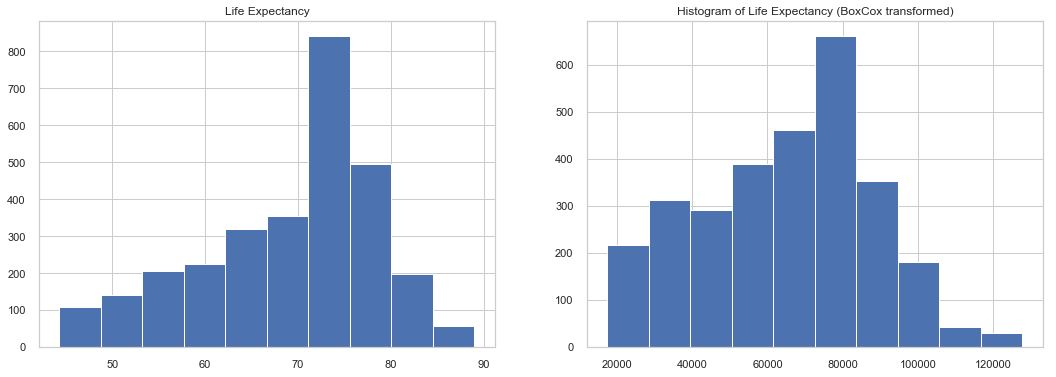

In [205]:
from scipy.stats import boxcox
life_expectancy_boxcox,_ = boxcox(df["life_expectancy_winsorized"])

plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
plt.hist(df['life_expectancy_winsorized'])
plt.title('Life Expectancy')

plt.subplot(1,2,2)
plt.hist(life_expectancy_boxcox)
plt.title("Histogram of Life Expectancy (BoxCox transformed)")


Text(0.5, 1.0, 'Winsorized Life Expectancy by Winsorized Schooling')

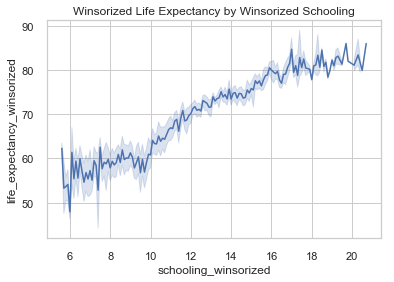

In [206]:
sns.lineplot(x="schooling_winsorized", y="life_expectancy_winsorized",data=df)
plt.title('Winsorized Life Expectancy by Winsorized Schooling')

#### Feature 1: Schooling

In [207]:
df['schooling_winsorized'].describe()

count    2938.000000
mean       11.722124
std         3.380832
min         5.600000
25%         9.500000
50%        12.100000
75%        14.100000
max        20.700000
Name: schooling_winsorized, dtype: float64

The relationship between the variables is linear. The description of the variable also gives us more insight that the distribution is close to normal since mean and median are relatively close to each other.

In [208]:
jb_stats_schooling = jarque_bera(np.sqrt(df["schooling_winsorized"]))
norm_stats_schooling = normaltest(np.sqrt(df["schooling_winsorized"]))

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats_schooling[0], jb_stats_schooling[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats_schooling[0], norm_stats_schooling[1]))


Jarque-Bera test statistics is 156.76781018509564 and p value is 0.0
Normality test statistics is 161.0886310828581 and p value is 1.0472447978169243e-35


Text(0.5, 1.0, 'Histogram of schooling (BoxCox transformed)')

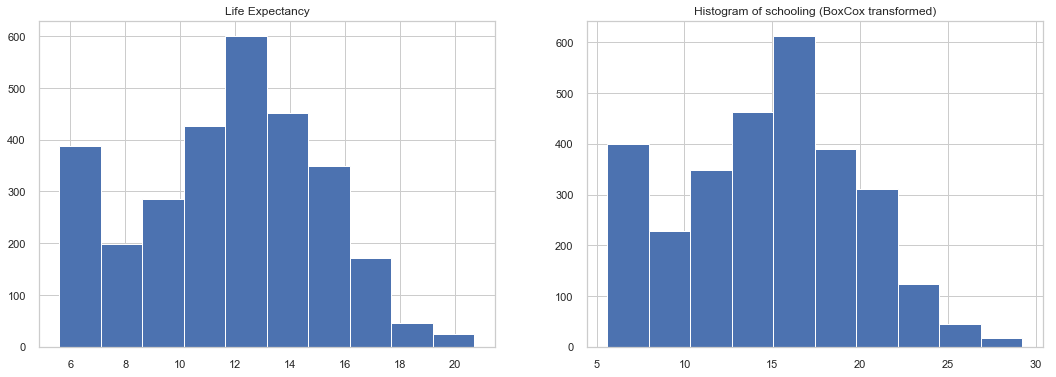

In [209]:
schooling_boxcox,_ = boxcox(df["schooling_winsorized"])

plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
plt.hist(df['schooling_winsorized'])
plt.title('Life Expectancy')

plt.subplot(1,2,2)
plt.hist(schooling_boxcox)
plt.title("Histogram of schooling (BoxCox transformed)")

#### Feature 2: Income composition of resources

Text(0.5, 1.0, 'Winsorized Life Expectancy by Winsorized Schooling')

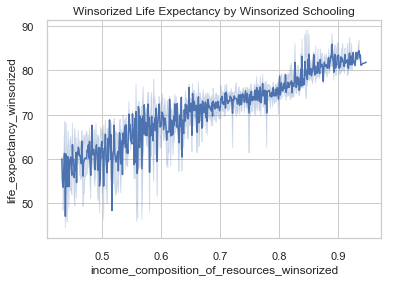

In [210]:
sns.lineplot(x="income_composition_of_resources_winsorized", y="life_expectancy_winsorized",data=df)
plt.title('Winsorized Life Expectancy by Winsorized Schooling')

In [211]:
df['income_composition_of_resources_winsorized'].describe()

count    2938.000000
mean        0.641210
std         0.159492
min         0.431000
25%         0.465000
50%         0.662000
75%         0.772000
max         0.948000
Name: income_composition_of_resources_winsorized, dtype: float64

Similar to winsorized schooling, income has a linear relationship with life expectancy. Life expectancy and income have the highest positive correlation (0.78).

In [212]:
jb_stats_income = jarque_bera(np.sqrt(df["income_composition_of_resources_winsorized"]))
norm_stats_income = normaltest(np.sqrt(df["income_composition_of_resources_winsorized"]))

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats_income[0], jb_stats_income[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats_income[0], norm_stats_income[1]))


Jarque-Bera test statistics is 236.28535697317747 and p value is 0.0
Normality test statistics is 42788.343825282136 and p value is 0.0


Text(0.5, 1.0, 'Histogram of Income (BoxCox transformed)')

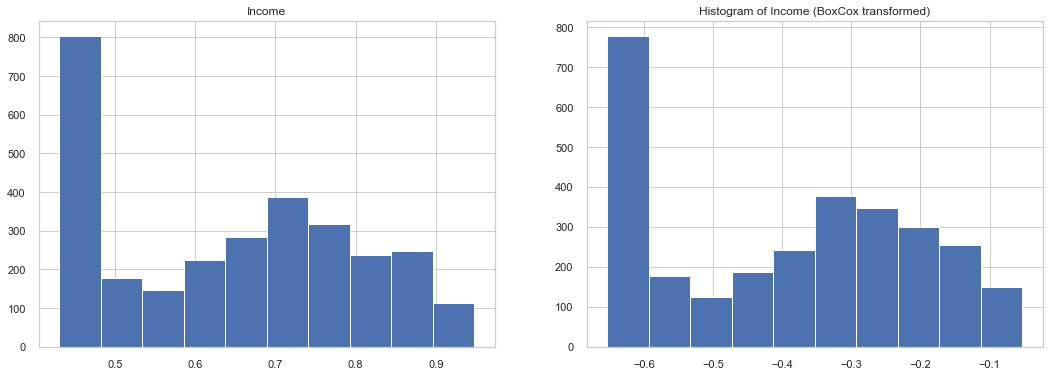

In [213]:
income_boxcox,_ = boxcox(df["income_composition_of_resources_winsorized"])

plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
plt.hist(df['income_composition_of_resources_winsorized'])
plt.title('Income')

plt.subplot(1,2,2)
plt.hist(income_boxcox)
plt.title("Histogram of Income (BoxCox transformed)")

#### Feature 3: HIV/AIDS

In [214]:
jb_stats_hiv_aids = jarque_bera(np.sqrt(df["hiv_aids_winsorized"]))
norm_stats_hiv_aids = normaltest(np.sqrt(df["hiv_aids_winsorized"]))

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats_hiv_aids[0], jb_stats_hiv_aids[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats_hiv_aids[0], norm_stats_hiv_aids[1]))


Jarque-Bera test statistics is 580.9472866410667 and p value is 0.0
Normality test statistics is 551.3106676121811 and p value is 1.924906419275934e-120


Text(0.5, 1.0, 'Histogram of hiv_aids (BoxCox transformed)')

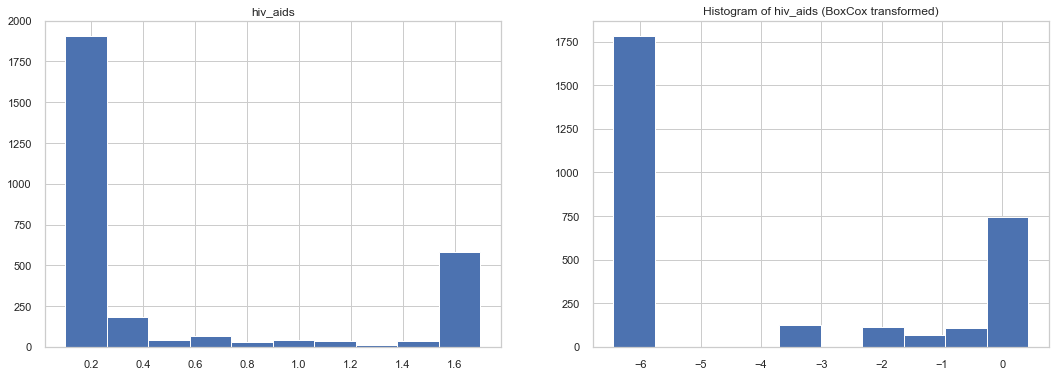

In [215]:
hiv_aids_boxcox,_ = boxcox(df["hiv_aids_winsorized"])

plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
plt.hist(df['hiv_aids_winsorized'])
plt.title('hiv_aids')

plt.subplot(1,2,2)
plt.hist(hiv_aids_boxcox)
plt.title("Histogram of hiv_aids (BoxCox transformed)")

#### Feature 4: Status and Country

I will try encoders to convert categorical to numerical as part of model preparation, as model can only take numerical values as input.

In [216]:
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'country'. 
df['country']= label_encoder.fit_transform(df['country']) 
  
df['country'].unique() 

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  44,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [217]:
# one-hot encoding the Grade variable: 
pd.get_dummies(df["status"])

,Developed,Developing
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
5,0,1
6,0,1
7,0,1
8,0,1
9,0,1


# Create correlation matrix for features 

In [218]:
features_final = ['life_expectancy_winsorized', 'hiv_aids_winsorized',
       'income_composition_of_resources_winsorized', 'schooling_winsorized']

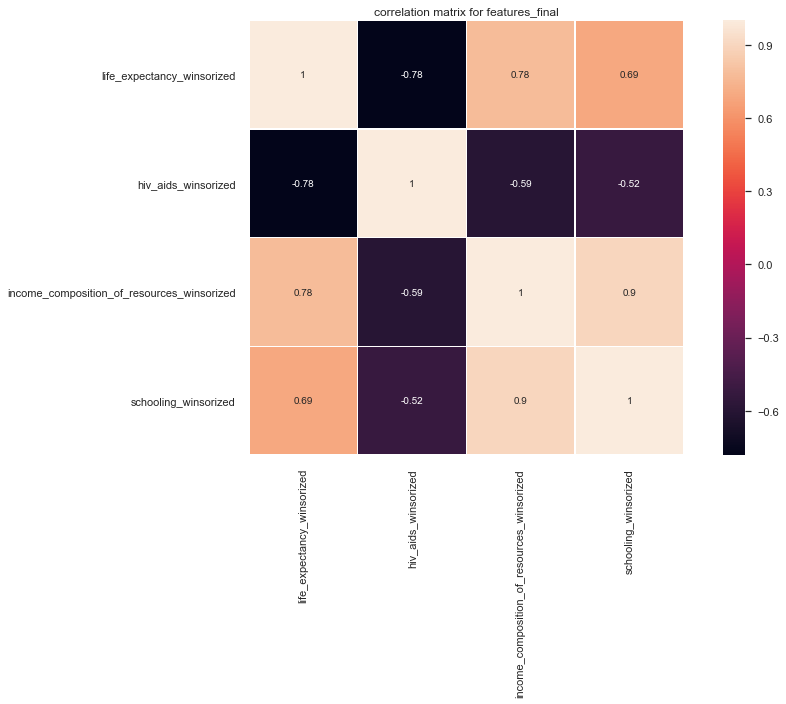

In [219]:
plt.figure(figsize=(14,8))
sns.heatmap(df[features_final].corr(), square=True, annot=True, linewidths=.5)
plt.title("correlation matrix for features_final")
plt.show()

In [223]:

df['life_expectancy_boxcox'] = life_expectancy_boxcox
df['hiv_aids_boxcox'] = hiv_aids_boxcox
df['income_boxcox'] = income_boxcox
df['schooling_boxcox'] = schooling_boxcox
features_final_boxcox = ['life_expectancy_boxcox', 'hiv_aids_boxcox',
       'income_boxcox', 'schooling_boxcox']

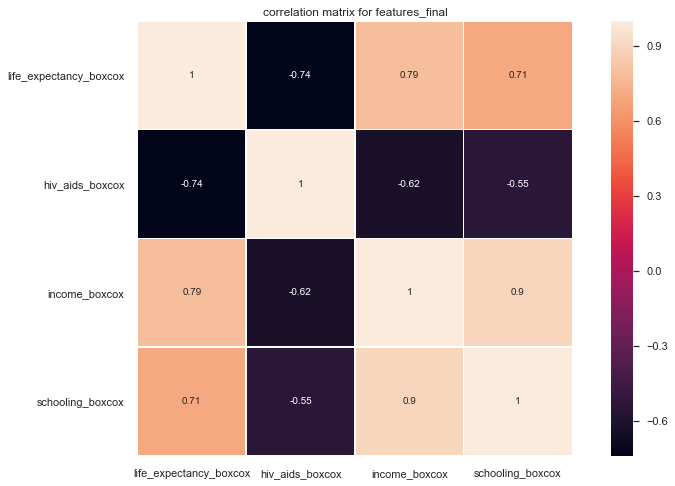

In [224]:
plt.figure(figsize=(14,8))
sns.heatmap(df[features_final_boxcox].corr(), square=True, annot=True, linewidths=.5)
plt.title("correlation matrix for features_final")
plt.show()

We can observe that winsorized schooling is more correlated with winsorized income composition of resources than our target variable so we will drop that feature. 

## 4. Summarize your findings. One of the most important skills of a data scientist is to convey ideas and findings to nontechnical people using understandable language. In this regard, one of the most effective ways to communicate your ideas is to do it using effective visual- ization.

After comparing descriptive statistics on before and after the dataset was filling with missing values, the means of variable did not drastically shift so we assume that the data was missing at random. Then, we detected outliers by plotting boxplots and set limits to extreme values with the winsorization method. To explore the relationship between life expectancy and other variables, we plotted histograms and scatterplots. 

Using a heatmap we observe the correlation between variables, trying to select variables that have the most affect on life expectancy. After evaluating each variable to see if it was suitable for a machine learning model, we came to a decision of selecting the following variables:

#### Postive features

- income composition of resources
- status

#### Negative features

- HIV/AIDS

